# Exploring the basic funtionality of Qiskit

Build a Bell state (two entangled qubits), sample the results and show the quantum circuit

In [1]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

{'11': 507, '00': 517}


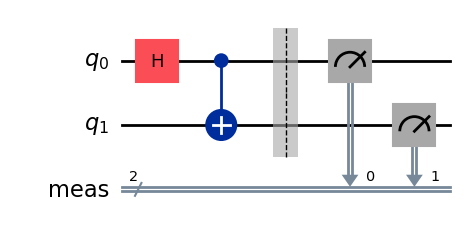

In [3]:
sampler = StatevectorSampler()
result = sampler.run([qc], shots=1024).result()
print(result[0].data.meas.get_counts())
qc.draw("mpl")

Transpile the circuit tu run on the actual toplology of a QPU

In [4]:
from qiskit_ibm_runtime.fake_provider import FakeWashingtonV2
from qiskit.transpiler import generate_preset_pass_manager

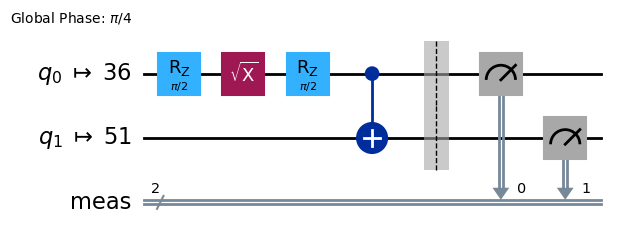

In [5]:
backend = FakeWashingtonV2()
pass_manager = generate_preset_pass_manager(backend=backend)

transpiled = pass_manager.run(qc)
transpiled.draw("mpl")

Test the circuit with Aer, the higt performance simulator provided by IBM

In [6]:
from qiskit_aer.primitives import SamplerV2

In [8]:
sampler = SamplerV2.from_backend(backend)
job = sampler.run([transpiled], shots=1024)
result = job.result()
print(f"counts for Bell circuit : {result[0].data.meas.get_counts()}")

counts for Bell circuit : {'00': 525, '11': 483, '01': 10, '10': 6}
